In [ ]:
import sys, os
sys.path.append(os.pardir)

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import pickle

In [ ]:
# 구글 드라이브에 있는 파일 가져오기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# PyTorch 설치
!pip3 install torch
!pip3 install torchvision
!pip3 install torchsummary

In [ ]:
train_file_path = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/train_filtered.csv'
test_file_path = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/test.csv'

# pandas read_csv로 읽기
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [ ]:
# train_data 형식 확인
train_data.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


In [ ]:
# test_data 형식 확인
test_data.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797


In [ ]:
# 데이터의 크기 확인
print('학습 데이터의 개수: {}'.format(len(train_data)))
print('테스트 데이터의 개수: {}'.format(len(test_data)))

학습 데이터의 개수: 249948
테스트 데이터의 개수: 7935


## 데이터셋 확인
---

### 1. 훈련 데이터셋 확인

가사 길이 최댓값: 17400
가사 길이 최솟값: 6
가사 길이 평균값: 1229.4994478851602
가사 길이 표준편차: 733.1442417364947
가사 길이 중간값: 1058.0


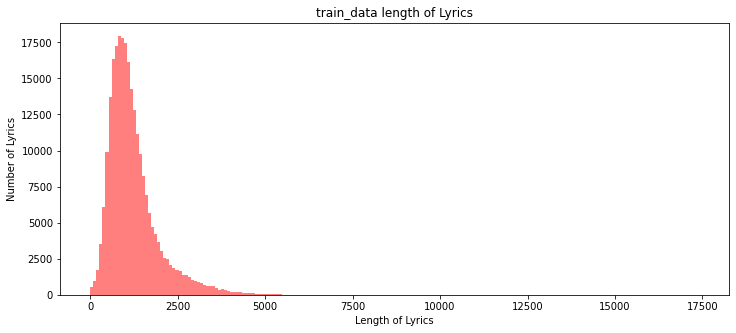

In [ ]:
# train_data 의 Lyrics의 길이 확인
train_data_lyrics_length = train_data['Lyrics'].apply(len)

# 그래프에 대한 이미지 크기 선언
plt.figure(figsize=(12, 5))

# 히스토그램 선언
plt.hist(train_data_lyrics_length, bins=200, alpha=0.5, color='r')
plt.title('train_data length of Lyrics')
plt.xlabel('Length of Lyrics')
plt.ylabel('Number of Lyrics')

# 통곗값 출력
print('가사 길이 최댓값: {}'.format(np.max(train_data_lyrics_length)))
print('가사 길이 최솟값: {}'.format(np.min(train_data_lyrics_length)))
print('가사 길이 평균값: {}'.format(np.mean(train_data_lyrics_length)))
print('가사 길이 표준편차: {}'.format(np.std(train_data_lyrics_length)))
print('가사 길이 중간값: {}'.format(np.median(train_data_lyrics_length)))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


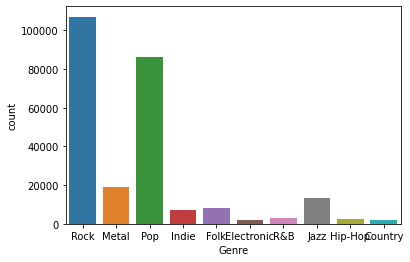

In [ ]:
# train_data 의 label 확인
import seaborn as sns
sns.countplot(train_data['Genre'])

### 2. 테스트 데이터셋 확인

가사 길이 최댓값: 12840
가사 길이 최솟값: 300
가사 길이 평균값: 1228.8620037807184
가사 길이 표준편차: 821.3442606128102
가사 길이 중간값: 1007.0


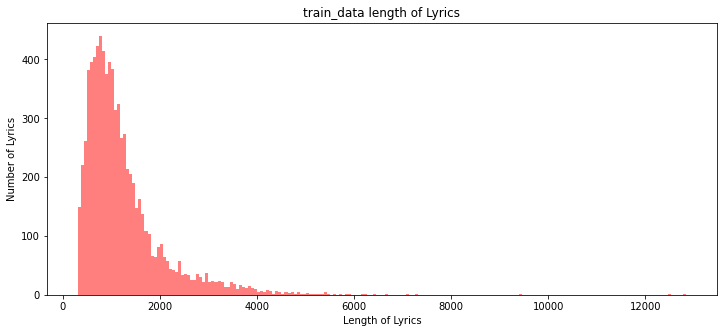

In [ ]:
# train_data 의 Lyrics의 길이 확인
test_data_lyrics_length = test_data['Lyrics'].apply(len)

# 그래프에 대한 이미지 크기 선언
plt.figure(figsize=(12, 5))

# 히스토그램 선언
plt.hist(test_data_lyrics_length, bins=200, alpha=0.5, color='r')
plt.title('train_data length of Lyrics')
plt.xlabel('Length of Lyrics')
plt.ylabel('Number of Lyrics')

# 통곗값 출력
print('가사 길이 최댓값: {}'.format(np.max(test_data_lyrics_length)))
print('가사 길이 최솟값: {}'.format(np.min(test_data_lyrics_length)))
print('가사 길이 평균값: {}'.format(np.mean(test_data_lyrics_length)))
print('가사 길이 표준편차: {}'.format(np.std(test_data_lyrics_length)))
print('가사 길이 중간값: {}'.format(np.median(test_data_lyrics_length)))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


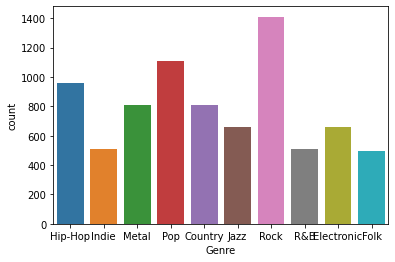

In [ ]:
# train_data 의 label 확인
import seaborn as sns
sns.countplot(test_data['Genre'])

## 데이터 전처리
---


In [ ]:
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')

# 전처리 함수 정의
def preprocessing(lyric, remove_stopwords = False, stops = set(stopwords.words('english'))):
  lyric_text = BeautifulSoup(lyric, "html5lib").get_text()  # HTML 태그 제거
  lyric_text = re.sub("[^a-zA-Z]", " ", lyric_text)         # 알파벳 아닌것 공백으로 변환
  lyric_text = lyric_text.lower()                           # 소문자

  lyric_words = lyric_text.split()
  if remove_stopwords:
    # 불용어 제거
    lyric_words = lyric_text.split()
    lyric_words = [w for w in lyric_words if not w in stops]
    
  lyric_text = ' '.join(lyric_words)
  return lyric_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
for i in range(len(train_data['Lyrics'])):
  train_data['Lyrics'][i] = preprocessing(train_data['Lyrics'][i])

train_data.to_csv("preprocessed_train_data.csv")

for i in range(len(test_data['Lyrics'])):
  test_data['Lyrics'][i] = preprocessing(test_data['Lyrics'][i])

test_data.to_csv("preprocessed_test_data.csv")

NameError: ignored

## 데이터셋 로딩
---



In [ ]:
import torch.nn as nn
from torchtext.legacy import data
from torchtext.legacy.data import TabularDataset

LYRIC = data.Field(sequential=True,
                   use_vocab=True,
                   tokenize=str.split,
                   batch_first=True,
                   lower=True,
)

GENRE = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=True,
                   is_target=True,
)

train_data, test_data = TabularDataset.splits(
    path='.',
    train='/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_train_data.csv',
    test='/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_test_data.csv',
    format='csv',
    fields=[('Genre', GENRE), ('Lyrics', LYRIC)],
    skip_header=True)


In [ ]:
print(len(train_data))
print(len(test_data))

249948
7935


In [ ]:
print(vars(train_data[0]))
print(vars(test_data[0]))

{'Genre': 'Pop', 'Lyrics': ['girlfriend', 'now', 'i', 'have', 'a', 'have', 'a', 'girlfriend', 'now', 'no', 'way', 'no', 'how', 'i', 'get', 'a', 'girlfriend', 'now', 'i', 'remember', 'it', 'vividly', 'love', 'i', 've', 'been', 'walking', 'erect', 'since', 'the', 'moment', 'we', 'met', 'and', 'i', 'caught', 'your', 'eyes', 'to', 'my', 'surprise', 'your', 'white', 'thighs', 'hebraic', 'neuroses', 'ceased', 'to', 'be', 'and', 'angel', 's', 'conversing', 'with', 'me', 'the', 'new', 'attractive', 'to', 'me', 'is', 'divine', 'and', 'even', 'if', 'your', 'friends', 'don', 't', 'understand', 'no', 'matter', 'what', 'i', 'll', 'always', 'be', 'your', 'man', 'and', 'even', 'if', 'you', 'go', 'you', 'know', 'you', 'll', 'leave', 'me', 'feeling', 'grand', 'yeah', 'yeah', 'i', 'll', 'need', 'new', 'contraceptives', 'green', 'eyes', 'i', 'thanked', 'god', 'when', 'you', 'left', 'him', 'green', 'eyes', 'let', 's', 'spend', 'the', 'night', 'entwined', 'out', 'on', 'the', 'boardwalk', 'in', 'sickly', 's

In [ ]:
# 단어 집합 만들기
LYRIC.build_vocab(train_data, min_freq=1)
GENRE.build_vocab(train_data, min_freq=1)

print('단어 집합의 크기: {}'.format(len(LYRIC.vocab)))
print('단어 집합의 크기: {}'.format(len(GENRE.vocab)))

단어 집합의 크기: 169472
단어 집합의 크기: 12


In [ ]:
print(GENRE.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f8428e3dc90>>, {'<unk>': 0, 'Rock': 1, 'Pop': 2, 'Metal': 3, 'Jazz': 4, 'Folk': 5, 'Indie': 6, 'R&B': 7, 'Hip-Hop': 8, 'Electronic': 9, 'Country': 10, 'en': 11})


In [ ]:
# 데이터 로더 만들기
from torchtext.legacy import data, datasets
from torchtext.legacy.data import Iterator
from torch.utils.data import DataLoader

BATCH_SIZE = 100

train_data, valid_data = train_data.split(split_ratio=0.8)

train_loader, val_loader, test_loader = data.BucketIterator.splits(
        (train_data, valid_data, test_data), batch_size=BATCH_SIZE,
        shuffle=True, repeat=False)

In [ ]:
# 데이터 로더 테스트
batch = next(train_loader)
print(batch)
# for batch in train_loader:
#   print(batch.Lyrics)
#   print(batch.Genre)
#   break

TypeError: ignored

In [ ]:
class GRU(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(GRU, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.gru = nn.GRU(embed_dim, self.hidden_dim,
                          num_layers=self.n_layers,
                          batch_first=True)
        self.out = nn.Linear(self.hidden_dim, n_classes)

    def forward(self, x):
        x = self.embed(x)
        h_0 = self._init_state(batch_size=x.size(0)) # 첫번째 히든 스테이트를 0벡터로 초기화
        x, _ = self.gru(x, h_0)  # GRU의 리턴값은 (배치 크기, 시퀀스 길이, 은닉 상태의 크기)
        h_t = x[:,-1,:] # (배치 크기, 은닉 상태의 크기)의 텐서로 크기가 변경됨. 즉, 마지막 time-step의 은닉 상태만 가져온다.
        logit = self.out(h_t)  # (배치 크기, 은닉 상태의 크기) -> (배치 크기, 출력층의 크기)
        return logit

    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import data, datasets
import random

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("cpu와 cuda 중 다음 기기로 학습함:", DEVICE)

SEED = 5
random.seed(SEED)
# torch.manual_seed(SEED)

# 하이퍼파라미터
# BATCH_SIZE = 64
lr = 0.001
EPOCHS = 10

n_classes = len(LABEL.vocab)
model = GRU(1, 256, len(TEXT.vocab), 128, n_classes, 0.5).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.Lyrics.to(DEVICE), batch.Genre.to(DEVICE)
        optimizer.zero_grad()
        logit = model(x)
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()

def evaluate(model, val_iter):
    """evaluate model"""
    model.eval()
    corrects, total_loss = 0, 0
    for batch in val_iter:
        x, y = batch.Lyrics.to(DEVICE), batch.Genre.to(DEVICE)
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction='sum')
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
    size = len(val_iter.dataset)
    avg_loss = total_loss / size
    avg_accuracy = 100.0 * corrects / size
    return avg_loss, avg_accuracy

cpu와 cuda 중 다음 기기로 학습함: cpu


In [ ]:
import torchvision

print(model)

GRU(
  (embed): Embedding(4437, 128)
  (gru): GRU(128, 256, batch_first=True)
  (out): Linear(in_features=256, out_features=36, bias=True)
)


In [ ]:
best_val_loss = None
for e in range(1, EPOCHS+1):
    train(model, optimizer, train_iter)
    val_loss, val_accuracy = evaluate(model, val_iter)

    print("[Epoch: %d] val loss : %5.2f | val accuracy : %5.2f" % (e, val_loss, val_accuracy))

    # 검증 오차가 가장 적은 최적의 모델을 저장
    if not best_val_loss or val_loss < best_val_loss:
        if not os.path.isdir("snapshot"):
            os.makedirs("snapshot")
        torch.save(model.state_dict(), './snapshot/txtclassification.pt')
        best_val_loss = val_loss

[Epoch: 1] val loss :  3.50 | val accuracy :  6.77
[Epoch: 2] val loss :  3.35 | val accuracy :  7.67
[Epoch: 3] val loss :  3.30 | val accuracy :  7.45
[Epoch: 4] val loss :  3.35 | val accuracy :  7.45
[Epoch: 5] val loss :  3.44 | val accuracy :  6.77
[Epoch: 6] val loss :  3.56 | val accuracy :  5.87
[Epoch: 7] val loss :  3.71 | val accuracy :  6.55
[Epoch: 8] val loss :  3.88 | val accuracy :  5.19
[Epoch: 9] val loss :  4.07 | val accuracy :  5.19
[Epoch: 10] val loss :  4.26 | val accuracy :  5.19


In [ ]:
model.load_state_dict(torch.load('./snapshot/txtclassification.pt'))
test_loss, test_acc = evaluate(model, test_iter)
print('테스트 오차: %5.2f | 테스트 정확도: %5.2f' % (test_loss, test_acc))

테스트 오차:  5.81 | 테스트 정확도:  0.00


In [ ]:
import sys, os
sys.path.append(os.pardir)

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import pickle

# 구글 드라이브에 있는 파일 가져오기
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# load preprocessed_train_data.csv
TRAIN_DATA_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_train_data.csv'
train_data = pd.read_csv(TRAIN_DATA_PATH)

train_data.head()

,Genre,Lyrics
0,Rock,it starts with pain followed by hate fueled by...
1,Rock,freedom alone again again alone patiently wait...
2,Rock,biting the hand that feeds you lying to the vo...
3,Rock,you say you know just who i am but you can t i...
4,Rock,my heart is beating faster can t control these...


In [ ]:
# load preprocessed_test_data.csv
TEST_DATA_PATH = '/content/drive/MyDrive/학교자료/4-2/정보검색/팀프로젝트/preprocessed_test_data.csv'
test_data = pd.read_csv(TEST_DATA_PATH)

test_data.head()

,Genre,Lyrics
0,Hip-Hop,most folks spend their days daydreaming of fin...
1,Indie,take your cold hands and put them on my face s...
2,Metal,are you ready it s time for war we ll break do...
3,Pop,you ask me why i change the color of my hair y...
4,Hip-Hop,do you believe in magic in a young girl s hear...


In [ ]:
# Null 제거
print(len(train_data))
train_data = train_data.dropna(how='any')
print(len(train_data))

print(len(test_data))
test_data = test_data.dropna(how='any')
print(len(test_data))

249948
249943
7935
7935


In [ ]:
# 훈련 데이터 X_train, y_train 형태로 만들기
# X_train
X_train = []
for lyric in train_data['Lyrics']:
  words = lyric.split()
  X_train.append(words)

X_train = np.array(X_train)
print('X_train 상위 10개---------------------------')
print(X_train[:10])

# y_train
y_train = np.array(train_data['Genre'])
print('y_train 상위 10개---------------------------')
print(y_train[:10])

# X_test
X_test = []
for lyric in test_data['Lyrics']:
  words = lyric.split()
  X_test.append(words)

X_test = np.array(X_test)
print('X_test 상위 10개---------------------------')
print(X_test[:10])

# y_test
y_test = np.array(test_data['Genre'])
print('y_test 상위 10개---------------------------')
print(y_test[:10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


X_train 상위 10개---------------------------
[list(['it', 'starts', 'with', 'pain', 'followed', 'by', 'hate', 'fueled', 'by', 'the', 'endless', 'questions', 'no', 'one', 'can', 'answer', 'a', 'stain', 'covers', 'your', 'heart', 'and', 'tears', 'you', 'apart', 'just', 'like', 'a', 'sleeping', 'cancer', 'i', 'don', 't', 'believe', 'men', 'are', 'born', 'to', 'be', 'killers', 'i', 'don', 't', 'believe', 'the', 'world', 'can', 'be', 'saved', 'how', 'did', 'you', 'get', 'here', 'and', 'when', 'did', 'it', 'start', 'an', 'innocent', 'child', 'with', 'a', 'thorn', 'in', 'his', 'heart', 'what', 'kind', 'of', 'world', 'do', 'we', 'live', 'in', 'where', 'love', 'is', 'divided', 'by', 'hate', 'loosing', 'control', 'of', 'our', 'feelings', 'we', 'all', 'must', 'be', 'dreaming', 'this', 'life', 'away', 'in', 'a', 'world', 'so', 'cold', 'are', 'you', 'sane', 'where', 's', 'the', 'shame', 'a', 'moment', 'of', 'time', 'passes', 'by', 'you', 'cannot', 'rewind', 'who', 's', 'to', 'blame', 'and', 'where', '

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
# 더이상 안쓰는 변수 메모리 비우기
import gc
del train_data
del test_data
gc.collect()

131

In [ ]:
import sys, os
import keras
sys.path.append(os.pardir)
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

print('단어집합의 크기: ', len(tokenizer.word_index))

단어집합의 크기:  169470


In [ ]:
# 정수 인코딩
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print(X_train[0])

[7, 958, 30, 274, 2474, 98, 366, 11249, 98, 3, 1413, 1448, 36, 51, 20, 767, 6, 3201, 2776, 15, 87, 5, 370, 2, 486, 31, 28, 6, 914, 3851, 1, 25, 10, 168, 614, 58, 461, 4, 21, 3251, 1, 25, 10, 168, 3, 101, 20, 21, 1299, 76, 180, 2, 43, 78, 5, 38, 180, 7, 271, 146, 1671, 512, 30, 6, 4804, 12, 136, 87, 32, 390, 14, 101, 39, 18, 163, 12, 93, 24, 22, 3909, 98, 366, 7039, 465, 14, 113, 819, 18, 19, 266, 21, 739, 35, 81, 83, 12, 6, 101, 26, 292, 58, 2, 3423, 93, 9, 3, 743, 6, 484, 14, 53, 2803, 98, 2, 684, 2509, 96, 9, 4, 623, 5, 93, 180, 7, 271, 22, 50, 6, 1878, 23, 15, 3424, 66, 2, 36, 87, 1, 25, 10, 168, 614, 58, 461, 4, 21, 3251, 1, 25, 10, 168, 3, 101, 20, 10, 21, 1299, 76, 180, 2, 43, 78, 5, 38, 180, 7, 271, 146, 1671, 512, 30, 6, 4804, 12, 136, 87, 32, 390, 14, 101, 39, 18, 163, 12, 93, 24, 22, 3909, 98, 366, 2281, 113, 239, 23, 36, 451, 18, 19, 266, 21, 739, 35, 81, 83, 12, 6, 101, 26, 292, 12, 6, 101, 26, 292, 50, 9, 6, 3424, 187, 2, 13, 549, 4, 1032, 7, 9, 6, 223, 2, 43, 38, 2, 20, 1

In [ ]:
# y 도 정수 인코딩 하기
label_vocab = {'Hip-Hop': 0,
               'Indie': 1,
               'Metal': 2,
               'Pop': 3,
               'Country': 4,
               'Jazz': 5,
               'Rock': 6,
               'R&B': 7,
               'Electronic': 8,
               'Folk': 9}

# y_train
y_train_encoded = []
for word in y_train:
  y_train_encoded.append(label_vocab[word])

print('정수인코딩된 y_train: {}'.format(y_train_encoded))


# y_test
y_test_encoded = []
for word in y_test:
  y_test_encoded.append(label_vocab[word])

print('정수인코딩된 y_test: {}'.format(y_test_encoded))

정수인코딩된 y_train: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

max length :  3410
average length :  260.3127833145957


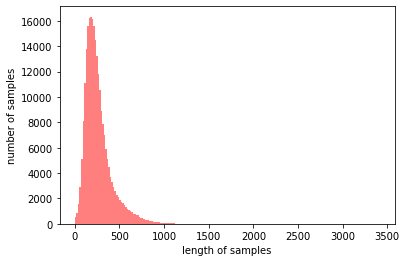

In [ ]:
print('max length : ', max(len(i) for i in X_train))
print('average length : ', sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=200, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 전체 샘플 중 길이가 max_len이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
below_threshold_len(1000, X_train)
below_threshold_len(1000, X_test)

전체 샘플 중 길이가 1000 이하인 샘플의 비율: 99.77434855146974
전체 샘플 중 길이가 1000 이하인 샘플의 비율: 99.63453056080655


In [ ]:
FIX_LEN = 1000
X_train = pad_sequences(X_train, FIX_LEN)
X_test = pad_sequences(X_test, FIX_LEN)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train_encoded)
print(y_train_encoded)

y_test_encoded = to_categorical(y_test_encoded)
print(y_test_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

ImportError: ignored

In [ ]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
N_VOCAB = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(N_VOCAB, 100))
model.add(LSTM(128))
model.add(Dense(10, activation='softmax'))

mc = ModelCheckpoint(
    'best_model.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(X_train.shape)
print(y_train_encoded.shape)

history = model.fit(
    X_train, y_train_encoded,
    epochs=20,
    batch_size=100,
    validation_split=0.2,
    callbacks=[mc]
)

(249943, 1000)
(249943, 10)
Epoch 1/20
2000/2000 [==============================] - 416s 207ms/step - loss: 1.1021 - accuracy: 0.5911 - val_loss: 2.4364 - val_accuracy: 0.4668
Epoch 2/20
2000/2000 [==============================] - 414s 207ms/step - loss: 0.8963 - accuracy: 0.6836 - val_loss: 2.5174 - val_accuracy: 0.4857
Epoch 3/20
2000/2000 [==============================] - 414s 207ms/step - loss: 0.7673 - accuracy: 0.7353 - val_loss: 2.6074 - val_accuracy: 0.4896
Epoch 4/20
2000/2000 [==============================] - 414s 207ms/step - loss: 0.6457 - accuracy: 0.7790 - val_loss: 2.8163 - val_accuracy: 0.4762
Epoch 5/20
2000/2000 [==============================] - 415s 207ms/step - loss: 0.5387 - accuracy: 0.8155 - val_loss: 3.0607 - val_accuracy: 0.4830
Epoch 6/20
2000/2000 [==============================] - 413s 207ms/step - loss: 0.4531 - accuracy: 0.8440 - val_loss: 3.2571 - val_accuracy: 0.4826
Epoch 7/20
2000/2000 [==============================] - 412s 206ms/step - loss: 0.38

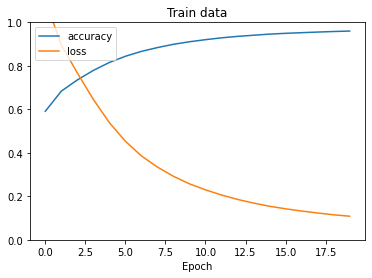

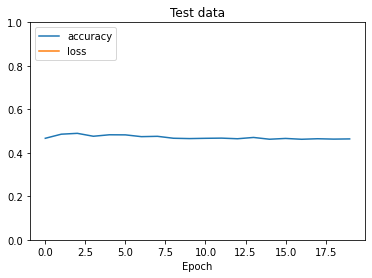

In [ ]:
# plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Train data')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Test data')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
N_VOCAB = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(N_VOCAB, 100))
model.add(LSTM(128, dropout=0.5))
model.add(Dense(10, activation='softmax'))

mc = ModelCheckpoint(
    'best_model.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

print(X_train.shape)
print(y_train_encoded.shape)

history = model.fit(
    X_train, y_train_encoded,
    epochs=20,
    batch_size=100,
    validation_split=0.2,
    callbacks=[mc]
)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_35 (Embedding)    (None, None, 100)         16947100  
                                                                 
 lstm_9 (LSTM)               (None, 128)               117248    
                                                                 
 dense_54 (Dense)            (None, 10)                1290      
                                                                 
Total params: 17,065,638
Trainable params: 17,065,638
Non-trainable params: 0
_________________________________________________________________
(249943, 1000)
(249943, 10)
Epoch 1/20
2000/2000 [==============================] - 422s 210ms/step - loss: 1.1276 - accuracy: 0.5755 - val_loss: 2.4856 - val_accuracy: 0.4605
Epoch 2/20
2000/2000 [==============================] - 420s 210ms/step - loss: 0.9256 - accuracy: 0.6706 - val_loss: 2.5547 - va

In [65]:
N_VOCAB = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(N_VOCAB, 100, input_length=1000))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

mc = ModelCheckpoint(
    'best_model.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(N_VOCAB)
print(X_train.shape)
print(y_train_encoded.shape)

model.summary()

history = model.fit(
    X_train, y_train_encoded,
    epochs=20,
    batch_size=100,
    validation_split=0.2,
    callbacks=[mc]
)

169471
(249943, 1000)
(249943, 10)
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 1000, 100)         16947100  
                                                                 
 flatten_2 (Flatten)         (None, 100000)            0         
                                                                 
 dense_52 (Dense)            (None, 128)               12800128  
                                                                 
 dense_53 (Dense)            (None, 10)                1290      
                                                                 
Total params: 29,748,518
Trainable params: 29,748,518
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2000/2000 [==============================] - 72s 36ms/step - loss: 0.9691 - accuracy: 0.6543 - val_loss: 2.9395 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
# 정수 인코딩
# 훈련 데이터와 테스트 데이터에 정수 인코딩 진행
# X_train 데이터를 이용하여 단어 집합 생성

# 단어 집합 (word_set) 만들기
word_set = set()
for words in X_train:
  word_set.update(words)

print('단어 집합의 크기: {}'.format(len(word_set)))

# 단어집합의 각 단어에 고유한 정수 맵핑
vocab = {tkn: i + 2 for i, tkn in enumerate(word_set)}
vocab['<unk>'] = 0  # 뭔지 모르는 단어 맵핑용
vocab['<pad>'] = 1  # 패딩 맵핑용

단어 집합의 크기: 169482


In [ ]:
print(len(vocab))

169484


In [ ]:
# vocab 사용해서 정수인코딩 하는 함수
def IntegerEncodingUsingVocab(words_list):
  encodeds = []
  for words in words_list:
    encoded = []
    for word in words:
      try:
        encoded.append(vocab[word])
      except KeyError:
        encoded.append(vocab['<unk>'])
    encodeds.append(encoded)
  return encodeds

In [ ]:
# X_train 을 정수인코딩 하기
X_train = IntegerEncodingUsingVocab(X_train)
print('정수인코딩된 X_train[0]: {}'.format(X_train[0]))

# X_test 을 정수인코딩 하기
X_test = IntegerEncodingUsingVocab(X_test)
print('정수인코딩된 X_test[0]: {}'.format(X_test[0]))

정수인코딩된 X_train[0]: [24451, 12703, 118853, 87514, 17357, 60761, 82961, 155448, 60761, 10729, 108454, 137937, 3525, 65445, 59674, 147370, 59383, 55460, 29817, 157373, 243, 91835, 43769, 55389, 152886, 3391, 32923, 59383, 161910, 55869, 29156, 67175, 137899, 150135, 57086, 87411, 73913, 149273, 146932, 69935, 29156, 67175, 137899, 150135, 10729, 86011, 59674, 146932, 5736, 131795, 143109, 55389, 75912, 75431, 91835, 65858, 143109, 24451, 118527, 11297, 139491, 9809, 118853, 59383, 107002, 31970, 168116, 243, 117669, 32190, 142357, 86011, 151070, 70847, 160034, 31970, 50319, 23174, 166328, 64900, 60761, 82961, 100757, 38928, 142357, 161418, 53781, 70847, 21313, 55622, 146932, 169368, 117537, 148409, 166170, 31970, 59383, 86011, 87761, 70460, 87411, 55389, 147762, 50319, 163663, 10729, 2266, 59383, 64959, 142357, 163984, 87957, 60761, 55389, 43106, 136079, 164780, 163663, 149273, 108174, 91835, 50319, 143109, 24451, 118527, 166328, 1487, 59383, 88341, 129782, 157373, 67814, 88074, 55389, 35

In [ ]:
# y 도 정수 인코딩 하기
label_vocab = {'Hip-Hop': 0,
               'Indie': 1,
               'Metal': 2,
               'Pop': 3,
               'Country': 4,
               'Jazz': 5,
               'Rock': 6,
               'R&B': 7,
               'Electronic': 8,
               'Folk': 9}

# y_train
y_train_encoded = []
for word in y_train:
  y_train_encoded.append(label_vocab[word])

print('정수인코딩된 y_train: {}'.format(y_train_encoded))


# y_test
y_test_encoded = []
for word in y_test:
  y_test_encoded.append(label_vocab[word])

print('정수인코딩된 y_test: {}'.format(y_test_encoded))

정수인코딩된 y_train: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

Max length: 3410
Average length: 260.3362539408197


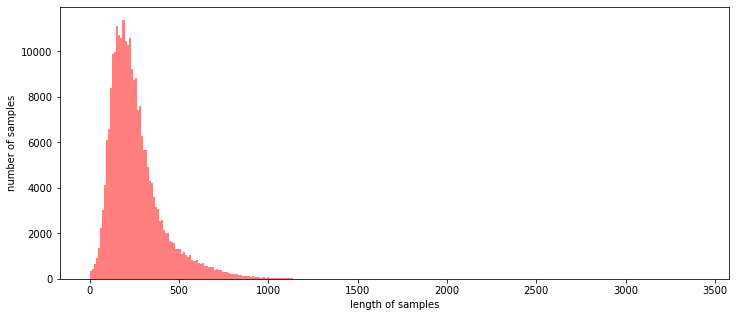

In [ ]:
# 모델이 처리할 수 있도록 데이터의 길이 동일하게 맞춰줘야함
# 가장 긴 가사 기준으로 맞추기

# 우선 X_train의 길이 분포 확인
%matplotlib inline
import matplotlib.pyplot as plt
print('Max length: {}'.format(max(len(i) for i in X_train)))
print('Average length: {}'.format(sum(map(len, X_train)) / len(X_train)))

plt.figure(figsize=(12, 5))
plt.hist([len(s) for s in X_train], bins=300, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

Max length: 2404
Average length: 257.42860743541274


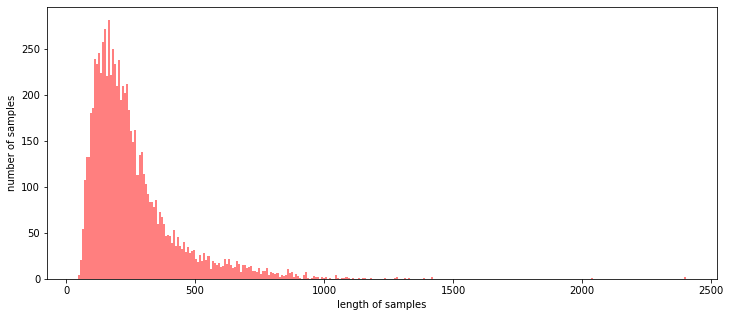

In [ ]:
# 혹시 모르니 X_test_encoded의 길이 분포도 확인
print('Max length: {}'.format(max(len(i) for i in X_test)))
print('Average length: {}'.format(sum(map(len, X_test)) / len(X_test)))

plt.figure(figsize=(12, 5))
plt.hist([len(s) for s in X_test], bins=300, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 가장 긴 (단어가 가장 많은) Lyric의 길이(단어의 개수)는 3410
# 다른 Lyric들도 3410 길이로 맞춰줘야함
MAX_LEN = 3410

# vocab 에서 패딩용 단어를 뜻하는 '<pad>' 의 index는 1
PAD = 1

# X_train_encoded 길이 패딩작업
for sentence in X_train:
  while len(sentence) < MAX_LEN:
    sentence.append(PAD)

# X_test_encoded 길이 패딩작업
for sentence in X_test:
  while len(sentence) < MAX_LEN:
    sentence.append(PAD)

Max length: 3410
Average length: 3410.0


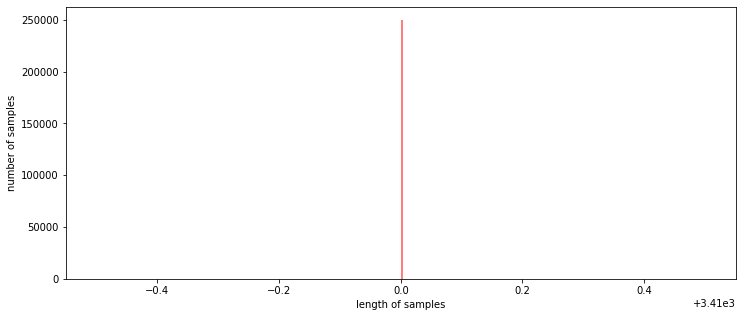

Max length: 3410
Average length: 3410.0


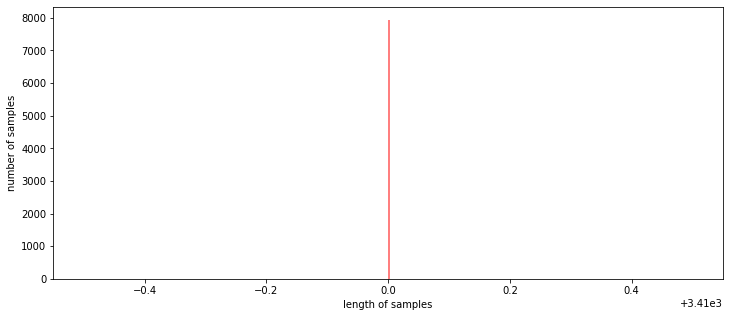

In [ ]:
# 패딩 작업 후 X_train의 길이분포 확인
print('Max length: {}'.format(max(len(i) for i in X_train)))
print('Average length: {}'.format(sum(map(len, X_train)) / len(X_train)))

plt.figure(figsize=(12, 5))
plt.hist([len(s) for s in X_train], bins=300, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 패딩 작업 후 X_test의 길이분포 확인
print('Max length: {}'.format(max(len(i) for i in X_test)))
print('Average length: {}'.format(sum(map(len, X_test)) / len(X_test)))

plt.figure(figsize=(12, 5))
plt.hist([len(s) for s in X_test], bins=300, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# dataloader 생성


In [ ]:
import torch
import torch.nn as nn
class LSTM(nn.Module):
  def __init__(self, n_vocab):
    super(LSTM, self).__init__()
    self.embedding = nn.Embedding(n_vocab, 100)
    self.lstm = nn.LSTM(input_size=100,
                        hidden_size=128,
                        num_layers=5,
                        bias=True,
                        batch_first=True)
    self.out = nn.Linear(128, 10)

  def forward(self, x):
    x = self.embedding(x)
    x, _ = self.lstm(x)
    x = self.out(x)
    return x

In [ ]:
def train(model, X, y, loss_function, optimizer):
    model.train()
    for i in range(len(X)):
      optimizer.zero_grad()
      predict = model(X[i])
      loss = loss_function(predict, y[i])
      loss.backward()
      optimizer.step()

def evaluate(model, X, y, loss_function):
    """evaluate model"""
    model.eval()
    corrects, total_loss = 0, 0
    for i in range(len(X)):
      predict = model(X[i])
      loss = loss_function(predict, y[i])
      total_loss += loss.items()
      corrects += (predict.argmax(1) == y[i]).type(torch.float).sum().item()

    size = len(X)
    avg_loss = total_loss / size
    avg_accuracy = 100.0 * corrects / size
    return avg_loss, avg_accuracy

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(DEVICE))

model = LSTM(len(vocab)).to(DEVICE)
print(model)

Using cpu device
LSTM(
  (embedding): Embedding(169484, 100)
  (lstm): LSTM(100, 128, num_layers=5, batch_first=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
LOSS_FUNCTION = nn.CrossEntropyLoss()
OPTIMIZER = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
X_train = torch.tensor(X_train)
y_train_encoded = torch.tensor(y_train_encoded)
X_test = torch.tensor(X_test)
y_test_encoded = torch.tensor(y_test_encoded)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  print(f"Epoch {epoch+1}\n------------------------------")
  train(model, X_train, y_train_encoded, LOSS_FUNCTION, OPTIMIZER)
  val_loss, val_acc = evaluate(model, X_test, y_test_encoded, LOSS_FUNCTION)
  print("[Epoch: %d] val loss : %5.2f | val accuracy : %5.2f" % (epoch, val_loss, val_acc))

print("Done!")

Epoch 1
------------------------------


TypeError: ignored